#Importações

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

#Funções Úteis

In [ ]:
def separate_data(data):
  x = np.array(data[:, 0:-1])
  y = np.array(data[:, -1]).reshape(-1, 1)

  return x, y.ravel()

In [ ]:
def generate_c(f, t):
  c = np.array([])
  for i in range(f, t+1):
    c = np.append(c, 2 ** i)
  return c

In [ ]:
def normalizacao(x, y):
  x_max = np.max(x, axis = 0)
  x_min = np.min(x, axis = 0)

  y_max = np.max(y, axis = 0)
  y_min = np.min(y, axis = 0)

  x = ((x - x_min)/(x_max - x_min))
  y = ((y - y_min)/(y_max - y_min))

  return x, x_max, x_min, y, y_max, y_min

def desnormalizacao(data, max, min):
  return data*(max - min) + min

In [ ]:
def plot_roc_curve(f_pf, t_pr):
  plt.plot(f_pf, t_pr, label='roc curve')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('taxa de falsos positivos')
  plt.ylabel('taxa de verdadeiros positivos')
  plt.title('roc curve')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
def plot_precision_recall_curve(p, r):
  plt.plot(p, r)
  plt.xlabel('recall')
  plt.ylabel('precisão')
  plt.title('precision-recall curve')
  plt.show()

#Questão 1

In [ ]:
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/californiabin.csv', delimiter=',')
data.shape

(2000, 9)

##Item a)

In [ ]:
size_train = int(0.8 * data.shape[0])
size_test = data.shape[0] - size_train

x_train, y_train = separate_data(data[:size_train])
x_test, y_test   = separate_data(data[size_test:])

x_train, _, _, _, _, _ = normalizacao(x_train, y_train)
x_test,  _, _, _, _, _ = normalizacao(x_test, y_test)

In [ ]:
param_grid = {
    'C': generate_c(-5, 15),
    'gamma': generate_c(-15, 3)
}

svc = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([3.1250e-02, 6.2500e-02, 1.2500e-01, 2.5000e-01, 5.0000e-01,
       1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
       3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02, 5.1200e+02,
       1.0240e+03, 2.0480e+03, 4.0960e+03, 8.1920e+03, 1.6384e+04,
       3.2768e+04]),
                         'gamma': array([3.05175781e-05, 6.10351562e-05, 1.22070312e-04, 2.44140625e-04,
       4.88281250e-04, 9.76562500e-04, 1.95312500e-03, 3.90625000e-03,
       7.81250000e-03, 1.56250000e-02, 3.12500000e-02, 6.25000000e-02,
       1.25000000e-01, 2.50000000e-01, 5.00000000e-01, 1.00000000e+00,
       2.00000000e+00, 4.00000000e+00, 8.00000000e+00])})

##Item b)

In [ ]:
best_params = grid_search.best_params_
print(best_params)

{'C': 16384.0, 'gamma': 2.0}


In [ ]:
model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
model.fit(x_train, y_train)

SVC(C=16384.0, gamma=2.0)

In [ ]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Acurácia:" , accuracy )
print("Precisão:" , precision)
print("Revocação:", recall   )
print("F1-Score:" , f1       )

Acurácia: 0.911875
Precisão: 0.9047029702970297
Revocação: 0.919496855345912
F1-Score: 0.9120399251403618


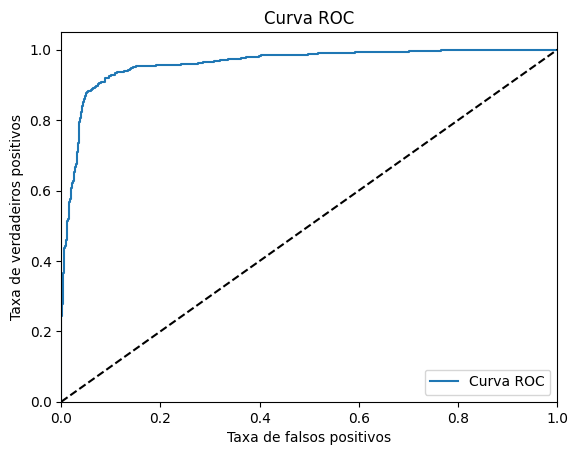

In [ ]:
scores = model.decision_function(x_test)

f_pr, t_pr = roc_curve(y_test, scores)
plot_roc_curve(f_pr, t_pr)

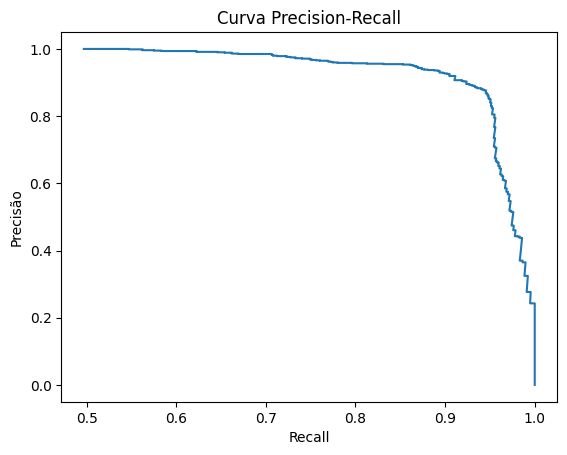

In [ ]:
precision, recal, _ = precision_recall_curve(y_test, scores)
plot_precision_recall_curve(precision, recal)